<a href="https://colab.research.google.com/github/madrigal1/capstone/blob/master/Combining_Airport_data_with_Disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combining Airport data with Disease dataset

## Importing data

In [93]:
! git clone https://github.com/hayat-tamboli/fluffy-octo-adventure.git

fatal: destination path 'fluffy-octo-adventure' already exists and is not an empty directory.


In [94]:
import pandas as pd
import numpy as np

In [95]:
disease_data = pd.read_csv("./fluffy-octo-adventure/Outbreaks.csv",index_col=0,usecols=['iso2', 'Year','Disease'])
disease_data.dropna(inplace=True)

In [96]:
disease_data.head()

,Year,Disease
iso2,,
AF,2000,Unspecified viral haemorrhagic fever
AF,2002,Infectious gastroenteritis or colitis without ...
AF,1998,Cholera
AF,1999,Severe acute respiratory syndrome
AF,2000,Cholera


In [97]:
IATA_code_country = pd.read_csv("./fluffy-octo-adventure/airport-iata-country.csv")
IATA_code_country.dropna(inplace=True)

In [98]:
IATA_code_country.tail(10)

,IATA Code,Name,Country
10635,ZRH,Zurich Airport,Switzerland
10636,WAX,Zuwarah,Libya
10637,EVN,Zvartnots International Airport,Armenia
10638,ZQW,Zweibruecken Airport,Germany
10639,ZKP,Zyryanka Airport,Russia
10640,GGB,Água Boa,Brazil
10641,QDH,‪Ashford International Railway Station‬‏,United Kingdom
10642,XRE,‪Reading Railway Station‬‏,United Kingdom
10643,XOU,‪Segovia Guiomar Railway Station‬‏,Spain
10644,ZYK,‪Shekou Ferry Terminal,China


In [99]:
routes = pd.read_csv("./fluffy-octo-adventure/routes.csv",usecols=['source_airport', 'destination_airport'])
routes.dropna(inplace=True)

In [100]:
routes.head()

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [101]:
iso2_country = pd.read_csv("./fluffy-octo-adventure/countries-lat-long.csv")
iso2_country.dropna(inplace=True)

In [102]:
iso2_country.head()

,iso2,lat,long,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


## Making airport_code_iso2 DF

In [103]:
airport_code_iso2 = pd.merge(IATA_code_country,iso2_country,left_on="Country",right_on="country")
airport_code_iso2.tail(10)

,IATA Code,Name,Country,iso2,lat,long,country
10408,RRG,Rodrigues Island Airport,Mauritius,MU,-20.348404,57.552152,Mauritius
10409,MRU,Sir Seewoosagur Ramgoolam International Airport,Mauritius,MU,-20.348404,57.552152,Mauritius
10410,ROP,Rota Airport,Northern Mariana Islands,MP,17.330830,145.384690,Northern Mariana Islands
10411,SPN,Saipan International Airport,Northern Mariana Islands,MP,17.330830,145.384690,Northern Mariana Islands
10412,TIQ,Tinian International,Northern Mariana Islands,MP,17.330830,145.384690,Northern Mariana Islands
10413,LYR,Svalbard Airport,Svalbard and Jan Mayen,SJ,77.553604,23.670272,Svalbard and Jan Mayen
10414,TNM,Teniente R. Marsh Martin,Antarctica,AQ,-75.250973,-0.071389,Antarctica
10415,UGL,Union Glacier Blue-Ice Runway,Antarctica,AQ,-75.250973,-0.071389,Antarctica
10416,FAE,Vagar Airport,Faroe Islands,FO,61.892635,-6.911806,Faroe Islands
10417,BJL,Yundum International Airport,Gambia,GM,13.443182,-15.310139,Gambia


In [104]:
airport_code_iso2 = airport_code_iso2.drop(["Country","country","Name"],axis=1)
airport_code_iso2.dropna(inplace=True)
airport_code_iso2

,IATA Code,iso2,lat,long
0,XNY,US,37.090240,-95.712891
1,OCH,US,37.090240,-95.712891
2,AYE,US,37.090240,-95.712891
3,ABR,US,37.090240,-95.712891
4,ABI,US,37.090240,-95.712891
...,...,...,...,...
10413,LYR,SJ,77.553604,23.670272
10414,TNM,AQ,-75.250973,-0.071389
10415,UGL,AQ,-75.250973,-0.071389
10416,FAE,FO,61.892635,-6.911806


## Making the table for Routes of flights with country codes

In [105]:
routes_source_merge = pd.merge(routes,airport_code_iso2,left_on="source_airport",right_on="IATA Code")

In [106]:
# renaming for source
routes_source_merge.rename(columns={"lat": "source_lat"}, inplace=True)
routes_source_merge.rename(columns={"long": "source_long"}, inplace=True)
routes_source_merge.rename(columns={"iso2": "source_iso2"}, inplace=True)
routes_source_merge.head()

,source_airport,destination_airport,IATA Code,source_iso2,source_lat,source_long
0,AER,KZN,AER,RU,61.52401,105.318756
1,AER,DYU,AER,RU,61.52401,105.318756
2,AER,KIV,AER,RU,61.52401,105.318756
3,AER,MSQ,AER,RU,61.52401,105.318756
4,AER,TAS,AER,RU,61.52401,105.318756


In [107]:
routes_complete_merge = pd.merge(routes_source_merge,airport_code_iso2,left_on="destination_airport",right_on="IATA Code")

In [108]:
# renaming for destination
routes_complete_merge.rename(columns={"iso2": "destination_iso2"}, inplace=True)
routes_complete_merge.rename(columns={"lat": "destination_lat"}, inplace=True)
routes_complete_merge.rename(columns={"long": "destination_long"}, inplace=True)
routes_complete_merge.head()

,source_airport,destination_airport,IATA Code_x,source_iso2,source_lat,source_long,IATA Code_y,destination_iso2,destination_lat,destination_long
0,AER,KZN,AER,RU,61.52401,105.318756,KZN,RU,61.52401,105.318756
1,ASF,KZN,ASF,RU,61.52401,105.318756,KZN,RU,61.52401,105.318756
2,CEK,KZN,CEK,RU,61.52401,105.318756,KZN,RU,61.52401,105.318756
3,DME,KZN,DME,RU,61.52401,105.318756,KZN,RU,61.52401,105.318756
4,DME,KZN,DME,RU,61.52401,105.318756,KZN,RU,61.52401,105.318756


In [109]:
# removing unnessecary fields
fields = ["source_iso2","destination_iso2", "source_lat", "source_long", "destination_lat", "destination_long"]
routes_iso2 = routes_complete_merge[fields]
routes_iso2.head(25)

,source_iso2,destination_iso2,source_lat,source_long,destination_lat,destination_long
0,RU,RU,61.524010,105.318756,61.52401,105.318756
1,RU,RU,61.524010,105.318756,61.52401,105.318756
2,RU,RU,61.524010,105.318756,61.52401,105.318756
3,RU,RU,61.524010,105.318756,61.52401,105.318756
4,RU,RU,61.524010,105.318756,61.52401,105.318756
5,RU,RU,61.524010,105.318756,61.52401,105.318756
6,RU,RU,61.524010,105.318756,61.52401,105.318756
7,RU,RU,61.524010,105.318756,61.52401,105.318756
8,RU,RU,61.524010,105.318756,61.52401,105.318756
9,RU,RU,61.524010,105.318756,61.52401,105.318756


In [110]:
#removing duplicates
routes_iso2 = routes_iso2.drop_duplicates()

In [111]:
#filtering out domestic routes
routes_iso2 = routes_iso2[routes_iso2['source_iso2'] != routes_iso2['destination_iso2']]
routes_iso2 = routes_iso2.reset_index()
routes_iso2.drop(["index"],axis=1,inplace=True)
routes_iso2.head()

,source_iso2,destination_iso2,source_lat,source_long,destination_lat,destination_long
0,AE,RU,23.424076,53.847818,61.52401,105.318756
1,UZ,RU,41.377491,64.585262,61.52401,105.318756
2,TR,RU,38.963745,35.243322,61.52401,105.318756
3,KZ,RU,48.019573,66.923684,61.52401,105.318756
4,TJ,RU,38.861034,71.276093,61.52401,105.318756


In [112]:
routes_iso2.sort_values("destination_iso2")

,source_iso2,destination_iso2,source_lat,source_long,destination_lat,destination_long
792,SN,AE,14.497401,-14.452362,23.424076,53.847818
832,DK,AE,56.263920,9.501785,23.424076,53.847818
833,AM,AE,40.069099,45.038189,23.424076,53.847818
834,TJ,AE,38.861034,71.276093,23.424076,53.847818
835,KG,AE,41.204380,74.766098,23.424076,53.847818
...,...,...,...,...,...,...
4023,ZA,ZW,-30.559482,22.937506,-19.015438,29.154857
4024,ET,ZW,9.145000,40.489673,-19.015438,29.154857
4025,AO,ZW,-11.202692,17.873887,-19.015438,29.154857
4026,TZ,ZW,-6.369028,34.888822,-19.015438,29.154857


# finding the latest diseases of all countries

In [113]:
# copying the dataset to save the original one
disease_data_exp = disease_data
disease_data_exp.sort_values("iso2", inplace=True)
disease_data_exp.reset_index(inplace=True)
disease_data_exp.dropna(inplace=True)
# retain all <= 2019
disease_data_exp = disease_data_exp.loc[disease_data_exp['Year'] <= 2019]
disease_data_exp.describe()



,Year
count,1454.000000
mean,2007.451857
std,6.961705
min,1996.000000
25%,2002.000000
50%,2009.000000
75%,2013.000000
max,2019.000000


In [114]:
disease_data_exp2 = disease_data_exp.to_numpy()

In [115]:
latest_diseases = []

In [116]:
prev_c = disease_data_exp2[0][0]
prev_y = disease_data_exp2[0][1]
max_y = disease_data_exp2[0][1]
itr = 0
for i in range(0,len(disease_data_exp2)):
  current_c = disease_data_exp2[i][0]
  current_y = disease_data_exp2[i][1]
  if(prev_c==current_c):
    if(max_y<current_y):
      max_y = current_y
      itr = i
  else:
    latest_diseases.append(list([disease_data_exp2[itr][0],disease_data_exp2[itr][1],disease_data_exp2[itr][2]]))
    max_y = current_y
    prev_c = current_c
    itr = i
    
print(latest_diseases)

[['AD', 2009, ' Influenza due to identified zoonotic or pandemic influenza virus'], ['AE', 2019, 'Middle East respiratory syndrome'], ['AF', 2019, 'Dengue fever, unspecified'], ['AG', 2009, ' Influenza due to identified zoonotic or pandemic influenza virus'], ['AL', 2011, 'West Nile virus infection'], ['AM', 2009, ' Influenza due to identified zoonotic or pandemic influenza virus'], ['AO', 2019, 'Acute poliomyelitis, unspecified'], ['AR', 2019, 'Hantavirus pulmonary syndrome'], ['AS', 2019, 'Measles'], ['AT', 2017, 'Acute hepatitis A'], ['AU', 2019, 'Measles'], ['AW', 2009, ' Influenza due to identified zoonotic or pandemic influenza virus'], ['AZ', 2009, ' Influenza due to identified zoonotic or pandemic influenza virus'], ['BA', 2015, 'Measles'], ['BB', 2016, 'Zika virus disease'], ['BD', 2019, 'Measles'], ['BE', 2017, 'Acute hepatitis A'], ['BF', 2017, 'Lassa fever'], ['BG', 2009, ' Influenza due to identified zoonotic or pandemic influenza virus'], ['BH', 2016, 'Middle East respira

In [117]:
# converting matrix of latest_diseases to dataframe
latest_diseases_df = pd.DataFrame(latest_diseases, columns=["iso2","latest_year","disease"])
latest_diseases_df = latest_diseases_df.drop_duplicates()
latest_diseases_df

,iso2,latest_year,disease
0,AD,2009,Influenza due to identified zoonotic or pande...
1,AE,2019,Middle East respiratory syndrome
2,AF,2019,"Dengue fever, unspecified"
3,AG,2009,Influenza due to identified zoonotic or pande...
4,AL,2011,West Nile virus infection
...,...,...,...
208,WS,2019,Measles
209,XK,2002,"Tularaemia, unspecified"
210,YE,2019,Measles
211,ZA,2018,"Listeriosis, unspecified"


# Graph Node Classification

In [118]:
import sys
!{sys.executable} -m pip install networkx tensorflow node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from geopy.distance import geodesic as GD

In [120]:
G2 = nx.Graph()

In [121]:
for i in range(0,len(routes_iso2)):
  loc1 = (routes_iso2['source_lat'][i], routes_iso2['source_long'][i])
  loc2 = (routes_iso2['destination_lat'][i], routes_iso2['destination_long'][i])
  distance = GD(loc1, loc2).km
  # adding edges and nodes along side in the graph
  G2.add_edge(routes_iso2['source_iso2'][i],routes_iso2['destination_iso2'][i], weight = distance)

In [122]:
print(G2)

Graph with 215 nodes and 2212 edges


In [123]:
print(G2.nodes())

['AE', 'RU', 'UZ', 'TR', 'KZ', 'TJ', 'KG', 'CN', 'IN', 'AF', 'DE', 'IR', 'MD', 'CY', 'IT', 'GR', 'IE', 'PT', 'GB', 'AT', 'LV', 'FR', 'UA', 'RO', 'BY', 'AZ', 'CH', 'SE', 'ES', 'NL', 'IL', 'HU', 'FI', 'CZ', 'PL', 'GE', 'AM', 'LT', 'LB', 'TM', 'TH', 'MY', 'SG', 'KR', 'JP', 'HK', 'VN', 'BE', 'ME', 'EG', 'DO', 'HR', 'TN', 'JO', 'LK', 'QA', 'US', 'MT', 'CU', 'BG', 'GH', 'SN', 'BF', 'NO', 'BR', 'CM', 'NG', 'DJ', 'KE', 'MA', 'BD', 'SA', 'NP', 'OM', 'PK', 'XK', 'DZ', 'RS', 'BA', 'ZA', 'DK', 'LY', 'BH', 'KW', 'CA', 'AL', 'UG', 'LU', 'ET', 'RW', 'TZ', 'GA', 'SI', 'TD', 'MV', 'EE', 'SD', 'IQ', 'YE', 'MN', 'MX', 'MU', 'SC', 'SK', 'PH', 'BN', 'GG', 'JE', 'CO', 'TW', 'AG', 'AR', 'VE', 'PR', 'BB', 'JM', 'AO', 'IS', 'CV', 'SL', 'GI', 'BS', 'AU', 'KH', 'ID', 'MO', 'NZ', 'LA', 'MG', 'GU', 'FJ', 'PG', 'ZM', 'SO', 'GM', 'PE', 'EC', 'CR', 'CL', 'UY', 'PA', 'SV', 'BO', 'GQ', 'MP', 'PF', 'PW', 'NC', 'ER', 'ML', 'ST', 'MZ', 'TG', 'LR', 'GT', 'NI', 'BZ', 'HN', 'TT', 'KY', 'MC', 'MR', 'BM', 'LC', 'IM', 'KP', 'BJ

In [124]:
print(G2.edges())

[('AE', 'RU'), ('AE', 'TJ'), ('AE', 'MD'), ('AE', 'BY'), ('AE', 'UZ'), ('AE', 'AM'), ('AE', 'TR'), ('AE', 'CZ'), ('AE', 'KG'), ('AE', 'PH'), ('AE', 'MY'), ('AE', 'BD'), ('AE', 'SA'), ('AE', 'NP'), ('AE', 'OM'), ('AE', 'AF'), ('AE', 'HU'), ('AE', 'BN'), ('AE', 'IN'), ('AE', 'UA'), ('AE', 'JO'), ('AE', 'RO'), ('AE', 'BH'), ('AE', 'LK'), ('AE', 'QA'), ('AE', 'KW'), ('AE', 'BG'), ('AE', 'LB'), ('AE', 'MV'), ('AE', 'SD'), ('AE', 'GR'), ('AE', 'DE'), ('AE', 'GB'), ('AE', 'IT'), ('AE', 'TH'), ('AE', 'HK'), ('AE', 'KZ'), ('AE', 'AZ'), ('AE', 'GH'), ('AE', 'SN'), ('AE', 'CH'), ('AE', 'CY'), ('AE', 'SE'), ('AE', 'BR'), ('AE', 'ES'), ('AE', 'NG'), ('AE', 'DJ'), ('AE', 'KE'), ('AE', 'JP'), ('AE', 'AU'), ('AE', 'VN'), ('AE', 'SG'), ('AE', 'TW'), ('AE', 'US'), ('AE', 'NL'), ('AE', 'MA'), ('AE', 'FR'), ('AE', 'CN'), ('AE', 'KR'), ('AE', 'EG'), ('AE', 'PK'), ('AE', 'DZ'), ('AE', 'RS'), ('AE', 'IE'), ('AE', 'PT'), ('AE', 'TN'), ('AE', 'AT'), ('AE', 'PL'), ('AE', 'ID'), ('AE', 'ZA'), ('AE', 'GE'), ('AE'

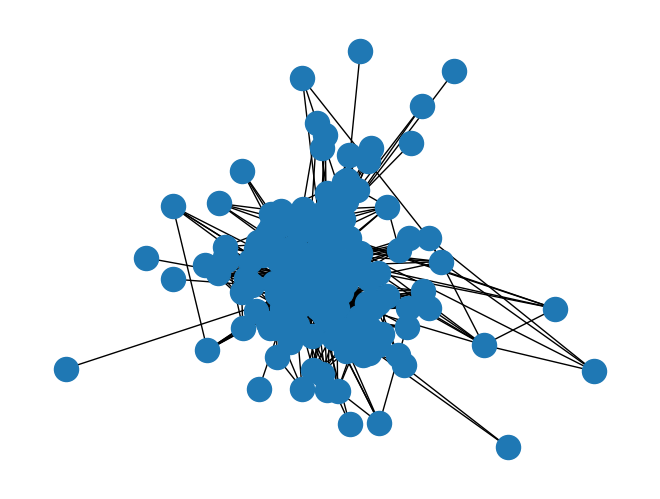

In [125]:
nx.draw(G2)

In [126]:
# adding disease data to every node
countries_in_graph = list(G2.nodes)
countries_in_graph.sort()
for country in countries_in_graph:
  latest_dis_row = latest_diseases_df[latest_diseases_df['iso2'] == country].to_numpy()
  if len(latest_dis_row)==0:
    # adding this to diease data of nodes whose disease data is not available
    G2.nodes[country]['disease'] = "no disease data found"
    continue
  else:
    latest_dis = latest_dis_row[0][2]
    G2.nodes[country]['disease'] = latest_dis

In [127]:
# print node and edge information
print("Nodes:", [G2.nodes[node]['disease'] for node in G2.nodes()])
print("Edges:", list(G2.edges()))

Nodes: ['Middle East respiratory syndrome', 'Measles', 'no disease data found', 'Measles', 'Measles', 'Acute poliomyelitis, unspecified', 'Measles', 'Measles', 'Unspecified viral disease', 'Dengue fever, unspecified', 'Acute hepatitis A', 'Acute poliomyelitis, unspecified', ' Influenza due to identified zoonotic or pandemic influenza virus', ' Influenza due to identified zoonotic or pandemic influenza virus', 'Chikungunya mosquito-borne viral fever', 'Measles', 'Acute hepatitis A', 'Acute hepatitis A', 'Gonococcal infection, unspecified', 'Acute hepatitis A', ' Influenza due to identified zoonotic or pandemic influenza virus', 'Zika virus disease', 'Measles', 'West Nile virus infection', 'no disease data found', ' Influenza due to identified zoonotic or pandemic influenza virus', 'Escherichia coli', 'Acute hepatitis A', 'Listeriosis, unspecified', 'Lassa fever', 'Measles', ' Influenza due to identified zoonotic or pandemic influenza virus', 'Acute hepatitis A', ' Influenza due to ident

In [128]:
# Generate the node embeddings with Node2Vec
node2vec = Node2Vec(G2, dimensions=16, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/215 [00:00<?, ?it/s]

In [129]:
# Prepare the data for classification
X = [model.wv[str(node)] for node in G2.nodes()]
# need to work here
y = [G2.nodes[node]['disease'] for node in G2.nodes()]
# print
print("Independent Vars: ", X)
print("Dependent Vars: ", y)

Independent Vars:  [array([ 0.04480889, -0.16546318,  0.00163253,  0.3487576 ,  0.23494843,
       -0.03438938,  0.31127888,  0.23629257, -0.22656068,  0.17791516,
       -0.1098861 , -0.34226757,  0.02166088, -0.10378075, -0.11224915,
        0.01753901], dtype=float32), array([ 0.15419008,  0.14550422,  0.18585035,  0.23736914,  0.2978637 ,
        0.24122375,  0.29533988,  0.34707943,  0.0449742 ,  0.3065601 ,
        0.2800516 , -0.28172505,  0.0168212 , -0.15474212, -0.05864004,
       -0.10799272], dtype=float32), array([-0.07967813,  0.10689735,  0.0465368 ,  0.2916823 ,  0.2266256 ,
        0.09246618,  0.21039778, -0.03264348,  0.14410633,  0.34913966,
       -0.04501854, -0.43732315,  0.2123249 , -0.32006058, -0.0923828 ,
       -0.26205343], dtype=float32), array([-0.05280652,  0.10164247, -0.07330576,  0.24159208,  0.10470034,
        0.12042758,  0.45800832,  0.3082625 ,  0.14306767,  0.13196392,
       -0.3837918 , -0.1474713 ,  0.07371569, -0.19186698, -0.22150965,
     

In [130]:
# Train a logistic regression classifier
clf = LogisticRegression(random_state=0).fit(X, y)

In [131]:
# Evaluate the classifier
y_pred = clf.predict(X)
pred_map = list(zip(list(G2.nodes),y_pred))
df_pred = pd.DataFrame(np.array(pred_map),columns=["country_iso_2","pred_disease"])
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3953488372093023


In [132]:
 df_pred

,country_iso_2,pred_disease
0,AE,Measles
1,RU,Influenza due to identified zoonotic or pande...
2,UZ,Measles
3,TR,Influenza due to identified zoonotic or pande...
4,KZ,Measles
...,...,...
210,NU,Measles
211,NR,Influenza due to identified zoonotic or pande...
212,CX,Influenza due to identified zoonotic or pande...
213,WF,Influenza due to identified zoonotic or pande...
